In [95]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.metrics import roc_auc_score, adjusted_rand_score
from sklearn.datasets import make_classification
%config IPCompleter.greedy=True
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LassoCV, RidgeCV, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn import metrics
import scipy
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (12, 6)})
import warnings
warnings.filterwarnings('ignore')
RANDOM_STATE = 17

In [19]:
X_train = np.loadtxt("../files/samsung_HAR/samsung_train.txt")
y_train = np.loadtxt("../files/samsung_HAR/samsung_train_labels.txt").astype(int)

X_test = np.loadtxt("../files/samsung_HAR/samsung_test.txt")
y_test = np.loadtxt("../files/samsung_HAR/samsung_test_labels.txt").astype(int)

In [20]:
X_train.shape, X_test.shape

((7352, 561), (2947, 561))

In [21]:
# Проверим размерности
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

In [22]:
X = np.concatenate([X_train, X_test], axis=0)

In [23]:
y = np.concatenate([y_train, y_test], axis=0)

In [24]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [34]:
X.shape

(10299, 561)

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

In [51]:
X_pca.shape

(10299, 65)

In [52]:
len(pca.explained_variance_ratio_)

65

In [53]:
pca.explained_variance_ratio_

array([0.50738221, 0.06239186, 0.02692564, 0.02452871, 0.01888936,
       0.01631395, 0.01414533, 0.01216211, 0.00985248, 0.00949228,
       0.00858304, 0.0080998 , 0.00765863, 0.00676668, 0.00630242,
       0.00615718, 0.00595335, 0.00577195, 0.00563431, 0.0054083 ,
       0.00518828, 0.00502742, 0.00473229, 0.00463818, 0.00446848,
       0.00439868, 0.00416863, 0.00400809, 0.00389072, 0.00381339,
       0.0036687 , 0.00364357, 0.00349225, 0.00346736, 0.00335539,
       0.00329411, 0.00323824, 0.00300508, 0.00294254, 0.00290452,
       0.00275765, 0.00269864, 0.00264196, 0.0025803 , 0.00255031,
       0.00247776, 0.00245537, 0.0023829 , 0.00235902, 0.00232044,
       0.0022836 , 0.00219182, 0.00212631, 0.00209145, 0.0020348 ,
       0.00201167, 0.00198111, 0.00194391, 0.00192509, 0.00189539,
       0.00186403, 0.00182923, 0.00180956, 0.00176364, 0.00174188])

In [54]:
X_pca

array([[-16.38097982,   1.99508307,   3.41569023, ...,   0.34256962,
         -0.24397444,  -1.94678658],
       [-15.58217328,   1.18259368,  -0.32120675, ...,   0.13742091,
         -0.16081322,  -0.61432028],
       [-15.42398918,   2.24316643,  -1.23778356, ...,  -1.47098019,
         -1.24311139,   0.24672176],
       ...,
       [ 11.84685312,  -3.43356502,   2.18801926, ...,  -0.94467044,
         -0.34497972,  -2.09465647],
       [  8.20668637,  -4.38648876,   1.31871955, ...,   0.11723446,
         -1.32786056,   0.08742446],
       [  9.31117251,  -3.98616133,   1.93301747, ...,   0.12988206,
         -1.86396408,  -0.18253505]])

In [55]:
pca.n_components_

65

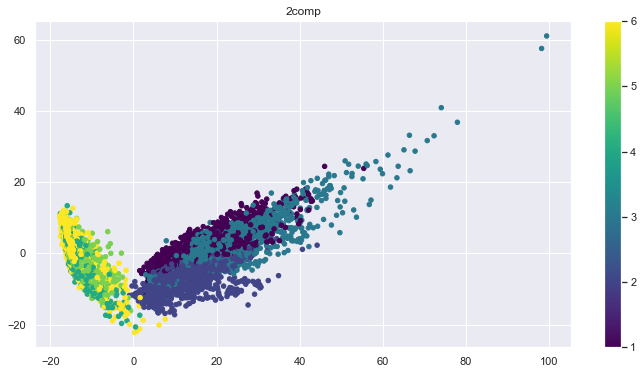

In [58]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, 
            s=20, cmap="viridis");
plt.colorbar();
plt.title('2comp');

In [133]:
kmeans = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
X_kmeans = kmeans.fit_transform(X_pca)

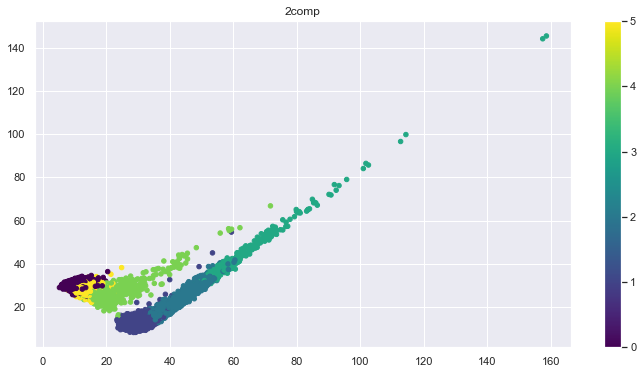

In [134]:
plt.scatter(X_kmeans[:, 0], X_kmeans[:, 1], c=kmeans.labels_, 
            s=20, cmap="viridis");
plt.colorbar();
plt.title('2comp');

In [135]:
tab = pd.crosstab(y, kmeans.labels_, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,0,904,740,78,0,0,1722
подъем вверх по лестнице,0,1242,295,5,2,0,1544
спуск по лестнице,0,320,890,196,0,0,1406
сидение,91,1,0,0,450,1235,1777
стояние,0,0,0,0,562,1344,1906
лежание,1558,5,0,0,329,52,1944
все,1649,2472,1925,279,1343,2631,10299


In [136]:
for i in (tab.values).tolist()[:-1]:
    print(max(i[:-1])/i[-1])

0.5249709639953543
0.8044041450777202
0.6330014224751067
0.694991558806978
0.7051416579223505
0.801440329218107


In [83]:
kmeans.inertia_

2003456.0834368276

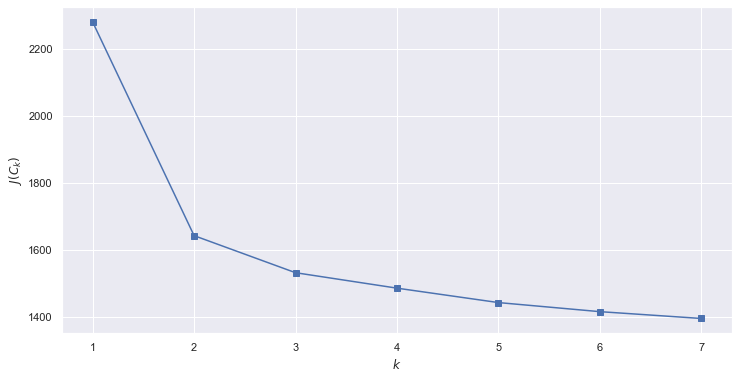

In [91]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=RANDOM_STATE).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [137]:
kmeans = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE).fit_predict(X_pca)
ag = AgglomerativeClustering(n_clusters=6, 
                             linkage='ward').fit_predict(X_pca)

In [138]:
adjusted_rand_score(y, kmeans), adjusted_rand_score(y, ag)

(0.4199036333641994, 0.49362763373004886)

In [157]:
scaler = StandardScaler()

In [158]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [176]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
best_svc = GridSearchCV(svc, svc_params, cv=3).fit(X_train_scaled, y_train)

In [177]:
best_svc.best_params_

{'C': 0.1}

In [178]:
y_predicted = best_svc.predict(X_test_scaled)

In [179]:
best_svc.best_score_

0.9382506099134881

In [180]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 
             'сидение', 'стояние', 'лежание', 'все']
tab.columns = tab.index
tab

,ходьба,подъем вверх по лестнице,спуск по лестнице,сидение,стояние,лежание,все
ходьба,494,2,0,0,0,0,496
подъем вверх по лестнице,12,459,0,0,0,0,471
спуск по лестнице,2,3,414,1,0,0,420
сидение,0,4,0,426,61,0,491
стояние,0,0,0,15,517,0,532
лежание,0,0,0,0,11,526,537
все,508,468,414,442,589,526,2947


In [ ]:
best_svc = GridSearchCV(svc, svc_params, cv=3).fit(X_train_scaled, y_train)

In [170]:
for i in (tab.values).tolist():
    print(max(i[:-1])/i[-1])

0.8850806451612904
0.9893842887473461
0.8928571428571429
0.7046843177189409
0.9755639097744361
0.9031657355679702
0.23719036308109942


In [147]:
X_train_scaled.shape, X_test_scaled.shape

((7352, 561), (2947, 561))

In [145]:
X_train_scaled_pca = pca.fit_transform(X_train)
X_test_scaled_pca = pca.transform(X_test)

In [148]:
X_train_scaled_pca.shape, X_test_scaled_pca.shape

((7352, 34), (2947, 34))

In [174]:
best_svc = GridSearchCV(svc, svc_params, cv=3).fit(X_train_scaled_pca, y_train)

In [175]:
best_svc.best_score_

0.8958138424688521